# 02. Univariate data

## Data-Driven Metrics

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/ch2_scores_em.csv',
                 index_col='student number')
# df의 처음 5행을 표시
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [5]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [6]:
scores_df = pd.DataFrame({'score':scores},
                         index=pd.Index(['A', 'B', 'C', 'D', 'E',
                                         'F', 'G', 'H', 'I', 'J'],
                                        name='student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


### Average (Expected Value)

In [14]:
# PMF - Discrete random variable
# PDF - Continuous radom variable

# Expecatation has the linearity

### Median

In [7]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [9]:
n = len(sorted_scores)
if n % 2 == 0 :
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
else :
    median = sorted_scores((n+1)// 2  - 1 )

median

56.5

### Mode

In [10]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [11]:
pd.Series([1, 2, 3, 4, 5]).mode()[1]

2

## Metrics of Data Variability

### Deviation

In [15]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [16]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53, 52, 59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [17]:
np.mean(deviation)

0.0

In [18]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [19]:
summary_df.mean()

score        55.0
deviation     0.0
dtype: float64

### Variance
- It qantifies the spread or risk in outcomes and has predicatable behavior under linear transformations

In [20]:
np.mean(deviation ** 2)

86.0

In [21]:
np.var(scores)

86.0

In [22]:
summary_df['square of deviation'] = np.square(deviation)
summary_df 

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [23]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [31]:
# variation
np.mean(np.square(scores)) - np.mean(scores) ** 2 

86.0

### standard deviation

In [32]:
np.sqrt(np.var(scores, ddof = 0))

9.273618495495704

In [33]:
np.std(scores, ddof = 0)

9.273618495495704

### Range and Interquartile Range (IQR)

- Quantiles are a way to summarize and visualize data distributions. 
- The k% quantile is the value where k% of data lies to the left.
- If data comes from a distribution with a PDF, the quantile corresponds to the point where the area under the curve (cumulative probability) 

### range

In [34]:
np.max(scores) - np.min(scores)

28

In [35]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)

scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

### Metrix of data

In [36]:
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

## Normalizaion

In [38]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [39]:
np.mean(z), np.std(z, ddof = 0)

(-1.6653345369377347e-17, 0.9999999999999999)

### 편차값 : 평균이 50, 표준편차가 10이 되도록 정규화한 값

In [40]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [41]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


### frequency table

In [43]:
english_scores = np.array(df['english'])
# Series로 변환하여 describe를 표시
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [44]:
freq, _ = np.histogram(english_scores, bins=10, range=(0, 100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [45]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
# freq_class를 인덱스로 DataFrame을 작성
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [46]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

Normal data: skew = -0.029, kurtosis = 0.121
Skewed data: skew = 2.104, kurtosis = 7.336


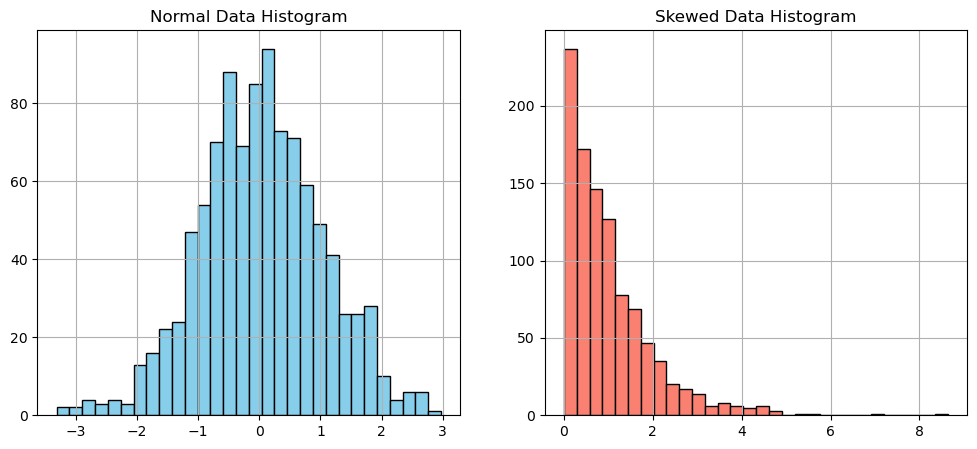

In [37]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 예제 데이터 생성
data = np.random.normal(loc=0, scale=1, size=1000)  # 정규분포 데이터
data_skewed = np.random.exponential(scale=1, size=1000)  # 양의 왜도 데이터

# 1️⃣ 왜도와 첨도 계산
skew_normal = stats.skew(data)
kurt_normal = stats.kurtosis(data)  # 기본값은 Fisher's definition (정규분포=0)

skew_exp = stats.skew(data_skewed)
kurt_exp = stats.kurtosis(data_skewed)

print("Normal data: skew = {:.3f}, kurtosis = {:.3f}".format(skew_normal, kurt_normal))
print("Skewed data: skew = {:.3f}, kurtosis = {:.3f}".format(skew_exp, kurt_exp))

# 2️⃣ 시각화
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(data, bins=30, color='skyblue', edgecolor='black')
plt.title('Normal Data Histogram')
plt.grid(True)

plt.subplot(1,2,2)
plt.hist(data_skewed, bins=30, color='salmon', edgecolor='black')
plt.title('Skewed Data Histogram')
plt.grid(True)

plt.show()